In [1]:
import pandas as pd 
import seaborn as sns 
import sqlite3
import numpy as np
from plotly import express as px

In [2]:
with sqlite3.connect("../tickets.db") as conn: 
    cmd = \
        """
        SELECT g.*, e.price, e.extractTime, e.ticket_count FROM extraction e
        LEFT JOIN games g on e.id = g.id
        """
    df = pd.read_sql_query(cmd, conn)
df['time'], df['extractTime'] = pd.to_datetime(df['time']), pd.to_datetime(df['extractTime'])
df['days_to_game'] = (df['time'] - df['extractTime'])
df['days_to_game'] = df['days_to_game'].apply(lambda X: X.days)
df = df.dropna()
df

,id,time,name,homeTeam,awayTeam,unique_name,price,extractTime,ticket_count,days_to_game
0,104722879.0,2021-06-11,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-11,58.62,2021-06-08 17:51:48.284897,0,2.0
1,104725408.0,2021-06-12,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-12,29.16,2021-06-08 17:51:48.284897,0,3.0
2,104725409.0,2021-06-13,Texas Rangers at Los Angeles Dodgers,Los Angeles Dodgers,Texas Rangers,Texas Rangers at Los Angeles Dodgers: 2021-06-13,28.04,2021-06-08 17:51:48.284897,0,4.0
3,104724531.0,2021-06-14,Philadelphia Phillies at Los Angeles Dodgers,Los Angeles Dodgers,Philadelphia Phillies,Philadelphia Phillies at Los Angeles Dodgers: ...,35.55,2021-06-08 17:51:48.284897,0,5.0
4,104725410.0,2021-06-15,Philadelphia Phillies at Los Angeles Dodgers,Los Angeles Dodgers,Philadelphia Phillies,Philadelphia Phillies at Los Angeles Dodgers: ...,24.99,2021-06-08 17:51:48.284897,0,6.0
...,...,...,...,...,...,...,...,...,...,...
7543,104738380.0,2021-09-29,Arizona Diamondbacks at San Francisco Giants,San Francisco Giants,Arizona Diamondbacks,Arizona Diamondbacks at San Francisco Giants: ...,20.41,2021-07-06 00:23:34.824989,2644,84.0
7544,104736599.0,2021-09-30,Arizona Diamondbacks at San Francisco Giants,San Francisco Giants,Arizona Diamondbacks,Arizona Diamondbacks at San Francisco Giants: ...,23.79,2021-07-06 00:23:34.824991,2642,85.0
7545,104736601.0,2021-10-01,San Diego Padres at San Francisco Giants,San Francisco Giants,San Diego Padres,San Diego Padres at San Francisco Giants: 2021...,32.69,2021-07-06 00:23:34.824994,2860,86.0
7546,104738382.0,2021-10-02,San Diego Padres at San Francisco Giants,San Francisco Giants,San Diego Padres,San Diego Padres at San Francisco Giants: 2021...,54.78,2021-07-06 00:23:34.824997,2919,87.0


In [3]:
def diff_from_max(x):
    initial = x.to_numpy()[0]
    return (initial - x)/x

In [4]:
df["diff_initial"] = df.groupby("unique_name")["price"].transform(diff_from_max)

In [5]:
dodgers = df[df['homeTeam'] == 'Los Angeles Dodgers']
giants = df[df['homeTeam'] == 'San Francisco Giants']
angels = df[df['homeTeam'] == 'Los Angeles Angels']

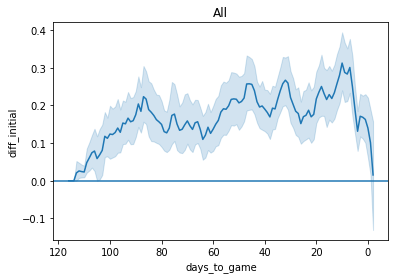

In [6]:
ax = sns.lineplot(x = "days_to_game", y = "diff_initial", data = df,)
ax.axhline(0)
ax.set_title("All")
ax = ax.invert_xaxis()

In [7]:
c = dodgers.groupby("days_to_game")['diff_initial'].mean().reset_index()
ax = px.line(c, x = "days_to_game", y = "diff_initial",)
ax.show()

2.0

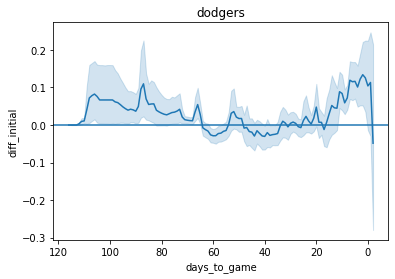

In [6]:
ax = sns.lineplot(x = "days_to_game", y = "diff_initial", data = dodgers)
ax.axhline(0)
ax.set_title("dodgers")
ax = ax.invert_xaxis()
dodgers.groupby("days_to_game")["diff_initial"].mean().idxmax()

In [7]:
giants[giants["awayTeam"] == "Los Angeles Dodgers"].groupby("unique_name")[["price"]].aggregate(["last", "first"])

price       
                                                     last  first
unique_name                                                     
Los Angeles Dodgers at San Francisco Giants: 20...  44.96  69.51
Los Angeles Dodgers at San Francisco Giants: 20...  50.02  70.13
Los Angeles Dodgers at San Francisco Giants: 20...  54.66  89.14
Los Angeles Dodgers at San Francisco Giants: 20...  57.24  75.65
Los Angeles Dodgers at San Francisco Giants: 20...  63.38  87.93
Los Angeles Dodgers at San Francisco Giants: 20...  63.38  92.21

In [7]:
giants[giants["id"] == 104736558.0]

,id,time,name,homeTeam,awayTeam,unique_name,price,extractTime,ticket_count,days_to_game,diff_initial
121,104736558.0,2021-07-28,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,70.13,2021-06-08 17:51:49.782776,0,49.0,0.000000
275,104736558.0,2021-07-28,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,69.50,2021-06-09 12:10:18.613780,0,48.0,0.009065
429,104736558.0,2021-07-28,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,69.50,2021-06-10 00:25:11.765557,0,47.0,0.009065
582,104736558.0,2021-07-28,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,69.50,2021-06-10 12:10:34.477656,0,47.0,0.009065
735,104736558.0,2021-07-28,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,69.50,2021-06-11 04:00:08.335012,1433,46.0,0.009065
888,104736558.0,2021-07-28,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,69.50,2021-06-11 12:09:18.542961,1435,46.0,0.009065
1041,104736558.0,2021-07-28,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,69.50,2021-06-12 00:19:19.627496,1395,45.0,0.009065
1193,104736558.0,2021-07-28,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,69.50,2021-06-12 12:08:55.197937,1397,45.0,0.009065
1345,104736558.0,2021-07-28,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,65.83,2021-06-13 00:24:04.981034,1537,44.0,0.065320
1496,104736558.0,2021-07-28,Los Angeles Dodgers at San Francisco Giants,San Francisco Giants,Los Angeles Dodgers,Los Angeles Dodgers at San Francisco Giants: 2...,65.83,2021-06-13 12:09:14.866903,1837,44.0,0.065320


In [16]:
dodgers.groupby("unique_name")[["price"]].mean().sort_values("price").reset_index()

,unique_name,price
0,Arizona Diamondbacks at Los Angeles Dodgers: 2...,21.640000
1,Atlanta Braves at Los Angeles Dodgers: 2021-08-31,26.550000
2,Texas Rangers at Los Angeles Dodgers: 2021-06-13,27.234000
3,Arizona Diamondbacks at Los Angeles Dodgers: 2...,27.761111
4,Philadelphia Phillies at Los Angeles Dodgers: ...,27.783333
5,Philadelphia Phillies at Los Angeles Dodgers: ...,27.843077
6,Arizona Diamondbacks at Los Angeles Dodgers: 2...,29.010000
7,San Francisco Giants at Los Angeles Dodgers: 2...,29.928889
8,Colorado Rockies at Los Angeles Dodgers: 2021-...,31.298333
9,Arizona Diamondbacks at Los Angeles Dodgers: 2...,32.056667
